In [145]:
x = np.array([2.358, 2.737, 2.738, 2.758, 2.315, 2.728, 2.426, 2.958, 2.178, 2.006])
y = np.array([2.162, 3.302, 2.956, 3.040, 2.430, 3.006, 2.548, 3.880, 2.124, 2.197])
# Сортировка точек по возрастанию x
z = dict()
for i in range(len(x)):
    z[x[i]] = y[i]
z = dict(sorted(z.items()))
x = np.array(list(z.keys()))
y = np.array(list(z.values()))

In [146]:
# Решение СЛАУ с матрицей коэффициентов А и своодных членов B методом Гаусса
def gauss(A, b):
    n = len(A)
    m = len(A[0])
    for i in range(n):
        # Нормализуем строку i
        norm = A[i][i]
        for j in range(i, m):
            A[i][j] /= norm
        b[i] /= norm

        # Вычитаем i-ую строку из всех нижних строк
        for j in range(i + 1, n):
            norm = A[j][i]
            for k in range(i, m):
                A[j][k] -= norm * A[i][k]
            b[j] -= norm * b[i]

    # Обратный ход
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= A[i][j] * x[j]
    return x

In [147]:
# Линейная аппроксимация
A = np.array([[n, np.sum(x)], [np.sum(x), np.sum([xi**2 for xi in x])]])
B = np.array([np.sum(y), np.sum(x*y)])
b,a = gauss(A,B)

In [148]:
# Квадратичная аппроксимация
A = np.array([[sum(x[i]**4 for i in range(n)), sum(x[i]**3 for i in range(n)), sum(x[i]**2 for i in range(n))],
[sum(x[i]**3 for i in range(n)), sum(x[i]**2 for i in range(n)), sum(x[i] for i in range(n))],
[sum(x[i]**2 for i in range(n)), sum(x[i] for i in range(n)), n]])
B = np.array([sum(x[i]**2*y[i] for i in range(n)), sum(x[i]*y[i] for i in range(n)), sum(y)])
a1,b1,c1 = gauss(A,B)

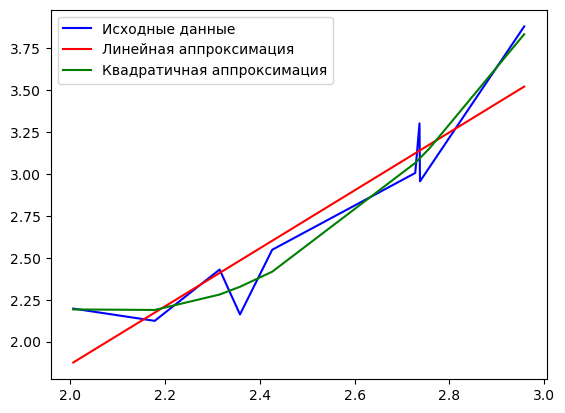

In [149]:
# Отрисовка графиков
import matplotlib.pyplot as plt
plt.plot(x, y, color='blue', label='Исходные данные')
plt.plot(x,[a*i+b for i in x], color='red', label='Линейная аппроксимация')
plt.plot(x,[a1*i*i+b1*i+c1 for i in x], color='green', label='Квадратичная аппроксимация')
plt.legend()
plt.show()